In [1]:
import pandas
df = pandas.read_csv('salary.csv', index_col = 0)
df.head()

,year,salary
1,2.4,6600
2,5.5,10100
3,3.3,7300
4,0.2,5000
5,1.5,6100


In [2]:
from matplotlib import pyplot as plt
X = df[['year']]
Y = df['salary'].values#从arraay取出数据

In [3]:
X

,year
1,2.4
2,5.5
3,3.3
4,0.2
5,1.5
6,7.4
7,7.8
8,5.6
9,2.8
10,6.2


In [4]:
type(X)

pandas.core.frame.DataFrame

In [5]:
Y

array([ 6600, 10100,  7300,  5000,  6100,  9900,  9000,  8800,  8400,
        9100, 10800,  8100,  6100,  9300,  8100,  9600,  8400,  9500,
       10500, 10100,  7000,  5400,  9700,  5000,  9300,  4700,  7600,
        6700,  9000,  7500,  4600,  4100,  9000,  7100,  4900,  9600,
        5900,  4900,  5300,  8900, 10000,  9300,  9000,  8800,  4200,
        5000,  3000,  9700,  9900,  5800,  9200,  4700,  9200,  8400,
       10800,  4300,  9400,  5600,  8500, 10200, 10700, 10800, 10000,
        4000,  9600, 10300,  9700,  8800,  5100,  9600,  7100,  9200,
        5100, 10500,  7900,  7200,  9800,  5500,  9900,  9300, 10200,
        9400, 10200, 10200,  9300,  9000,  5600,  9600,  7100,  5500,
        5300,  9000, 10300,  8000,  7200,  9300,  7300,  8300,  8300,  9000], dtype=int64)

In [6]:
type(Y)

numpy.ndarray

Populating the interactive namespace from numpy and matplotlib


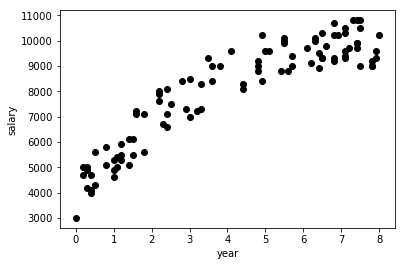

In [7]:
% pylab inline
plt.scatter(X,Y, color="black")
plt.xlabel('year')
plt.ylabel('salary')

In [4]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()#有点像类创建对象
regr.fit(X,Y)#线性回归

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
print('Coefficient:{}'.format(regr.coef_) )#系数K
print('Intercept:{}'.format(regr.intercept_) )#截距

Coefficient:[ 712.59413615]
Intercept:5049.009899813836


In [20]:
#regr.predict(X)#x年的预测年资

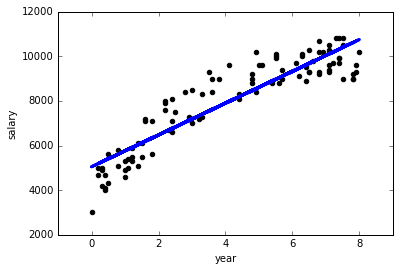

In [5]:
plt.scatter(X,Y, color="black")
plt.plot(X, regr.predict(X), linewidth = 3, color = "blue")#画出回归线
plt.xlabel('year')
plt.ylabel('salary')

In [6]:
from sklearn.preprocessing import PolynomialFeatures#多项式线性回归
from sklearn.linear_model import LinearRegression

poly_reg= PolynomialFeatures(degree = 2)#二次项
X_ = poly_reg.fit_transform(X)
regr = LinearRegression()
regr.fit(X_, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
X2 = X.sort_values(['year'])#x排序，根据year排序
X2_ = poly_reg.fit_transform(X2)

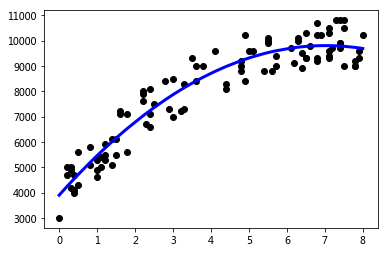

In [34]:
plt.scatter(X,Y, color="black")
plt.plot(X2, regr.predict(X2_), color= "blue", linewidth = 3)

In [8]:
import pandas
df = pandas.read_csv('house-prices.csv')

In [9]:
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [76]:
#pandas.get_dummies(df['Brick'])
#pandas.get_dummies(df['Neighborhood'])

In [10]:
house = pandas.concat([df, pandas.get_dummies(df['Brick']), pandas.get_dummies(df['Neighborhood'])], axis = 1)#合并
del house['No']#去除house的no
del house['West']
del house['Brick']
del house['Neighborhood']
del house['Home']
house.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Yes,East,North
0,114300,1790,2,2,2,0.0,1.0,0.0
1,114200,2030,4,2,3,0.0,1.0,0.0
2,114800,1740,3,2,1,0.0,1.0,0.0
3,94700,1980,3,2,3,0.0,1.0,0.0
4,119800,2130,3,3,3,0.0,1.0,0.0


In [11]:
X = house[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Yes', 'East', 'North']]
Y = house['Price'].values

In [12]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [141]:
#regr.predict(X)